# Import and install the package as a normal code package

In [1]:
import quilt

In [2]:
from quilt.data.nmduarte import gdelt

# Get data from different tables

In [3]:
mentions = gdelt.mentions()

In [4]:
events = gdelt.events()

In [5]:
news = gdelt.news()

# Do some analysis on a specific news

Import needed libs

In [40]:
import pandas as pd
import re
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

pd.set_option('display.max_colwidth', -1)

select the data and clean it

In [49]:
# select the data
news_to_search = news.query("SQLDATE=='20190626' and HashURL=='-3994566431981346630'")

# clean text - remove stop words, just keep a-z and A-Z
text_tok = str(news_to_search['NewsText'])
clean = text_tok.replace('\n', ' ').replace('\r', '')
clean = re.sub(r'[^a-zA-Z ]', '', clean)
stop_words = set(stopwords.words('english')) 

tokenize strings for analysis

In [47]:
tokenized_word=word_tokenize(clean)
clean_words = [w for w in tokenized_word if not w in stop_words]

fdist = FreqDist(clean_words)

Plot it

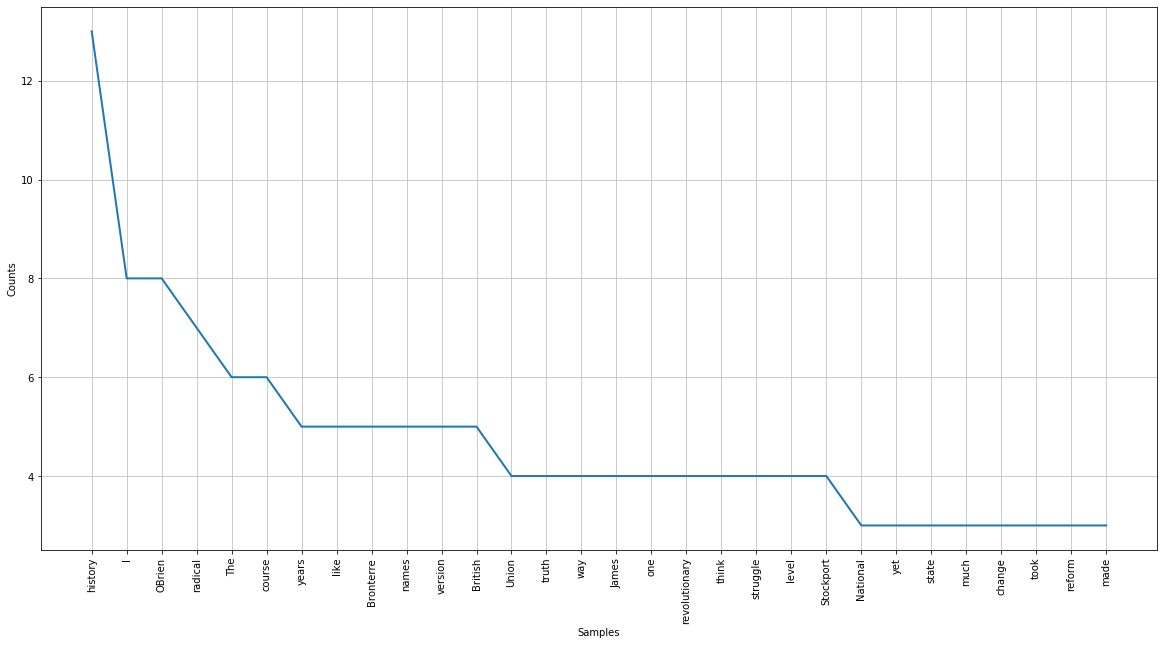

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fdist.plot(30,cumulative=False)
plt.show()